In [6]:
%matplotlib inline
### Standard imports
import uproot, uproot3, h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
### 3D PLOTTING
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.gridspec as gridspec
### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepIO as hio
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
# ### Settings
hf.DefaultSetup()
# hf.DefaultSetup()

In [2]:
fname = '/Users/sdporzio/Data/NERSC/Michel/datalog_2021_04_09_00_55_44_CESTevd.h5'
branch = 'hits'

h5 = h5py.File(fname,'r')
print(f'Available branches: {[t for t in h5.keys()]}')

events = h5['events']
print(f'Available keys in events: {[t for t in events.dtype.names]}')

ext_trigs = h5['ext_trigs']
print(f'Available keys in ext_trigs: {[t for t in ext_trigs.dtype.names]}')

hits = h5['hits']
print(f'Available keys in hits: {[t for t in hits.dtype.names]}')

tracks = h5['tracks']
print(f'Available keys in tracks: {[t for t in tracks.dtype.names]}')

Available branches: ['events', 'ext_trigs', 'hits', 'info', 'tracks']
Available keys in events: ['evid', 'track_ref', 'hit_ref', 'nhit', 'q', 'ts_start', 'ts_end', 'ntracks', 'ext_trig_ref', 'n_ext_trigs', 'unix_ts', 'q_raw']
Available keys in ext_trigs: ['trig_id', 'event_ref', 'ts', 'type']
Available keys in hits: ['hid', 'px', 'py', 'ts', 'q', 'iochannel', 'iogroup', 'chipid', 'channelid', 'geom', 'event_ref', 'q_raw']
Available keys in tracks: ['track_id', 'event_ref', 'hit_ref', 'theta', 't0', 'phi', 'xp', 'yp', 'nhit', 'q', 'ts_start', 'ts_end', 'residual', 'length', 'start', 'end', 'q_raw', 't0_type']


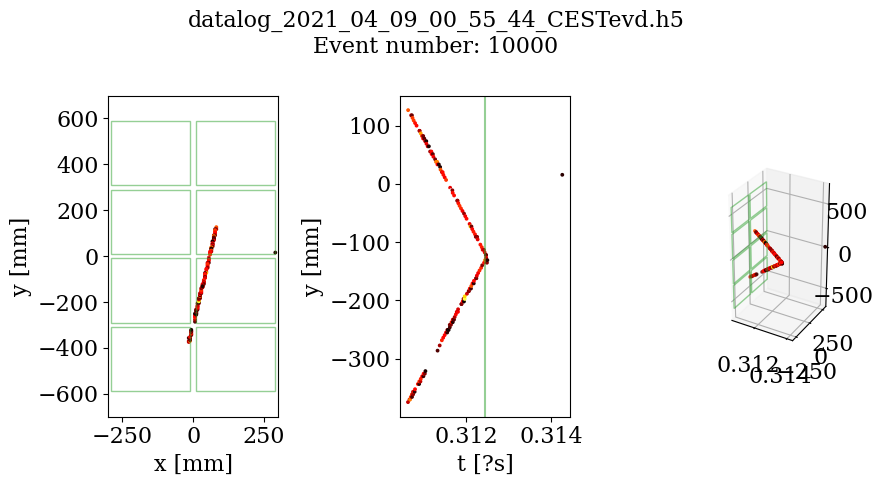

In [66]:
evn = 10000

t_hits = hits[events[evn]['hit_ref']]
xs = t_hits['px']
ys = t_hits['py']
ts = t_hits['ts']/1e6
qs = t_hits['q']

### PLOT START
fig = plt.figure(figsize=(9,5),facecolor='white',dpi=100)

cmap = 'hot'
size = 3
rcords = [
    [10,10],
    [-290,10],
    [10,-290],
    [-290,-290],
    [10,310],
    [-290,310],
    [10,-590],
    [-290,-590],
]

### PLOT 1
ax = fig.add_subplot(131)
ax.scatter(xs,ys,c=qs,s=size,cmap=cmap)
for rcord in rcords:
    rect = plt.Rectangle([rcord[0],rcord[1]], 280, 280, facecolor='none', edgecolor='C2', alpha=0.5)
    ax.add_patch(rect)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.xlim(-300,300)
plt.ylim(-700,700)

### PLOT 2
ax = fig.add_subplot(132)
meant = (np.max(ts)+np.min(ts))/2
ax.scatter(ts,ys,c=qs,s=size,cmap=cmap)
plt.axvline(meant,color='C2',alpha=0.5)
plt.xlabel('t [?s]')
plt.ylabel('y [mm]')

### PLOT 3
ax = fig.add_subplot(133,projection='3d')
rect = plt.Rectangle([-300,-600], 600, 1200, facecolor='none', edgecolor='C2', alpha=0.5)
for rcord in rcords:
    rect = plt.Rectangle([rcord[0],rcord[1]], 280, 280, facecolor='none', edgecolor='C2', alpha=0.5)
    ax.add_patch(rect)
    art3d.pathpatch_2d_to_3d(rect, z=min(ts), zdir="x")
ax.scatter(ts,xs,ys,c=qs,s=size,cmap=cmap)
ax.set_xlim3d(min(ts),max(ts))
ax.set_ylim3d(-300,300)
ax.set_zlim3d(-700,700)
ax.set_box_aspect(aspect = (1,1,2))

### ALL PLOTS
printname = fname.split('/')[-1]
plt.suptitle(f'{printname}\nEvent number: {evn}',fontsize=16)
plt.tight_layout()
plt.show()

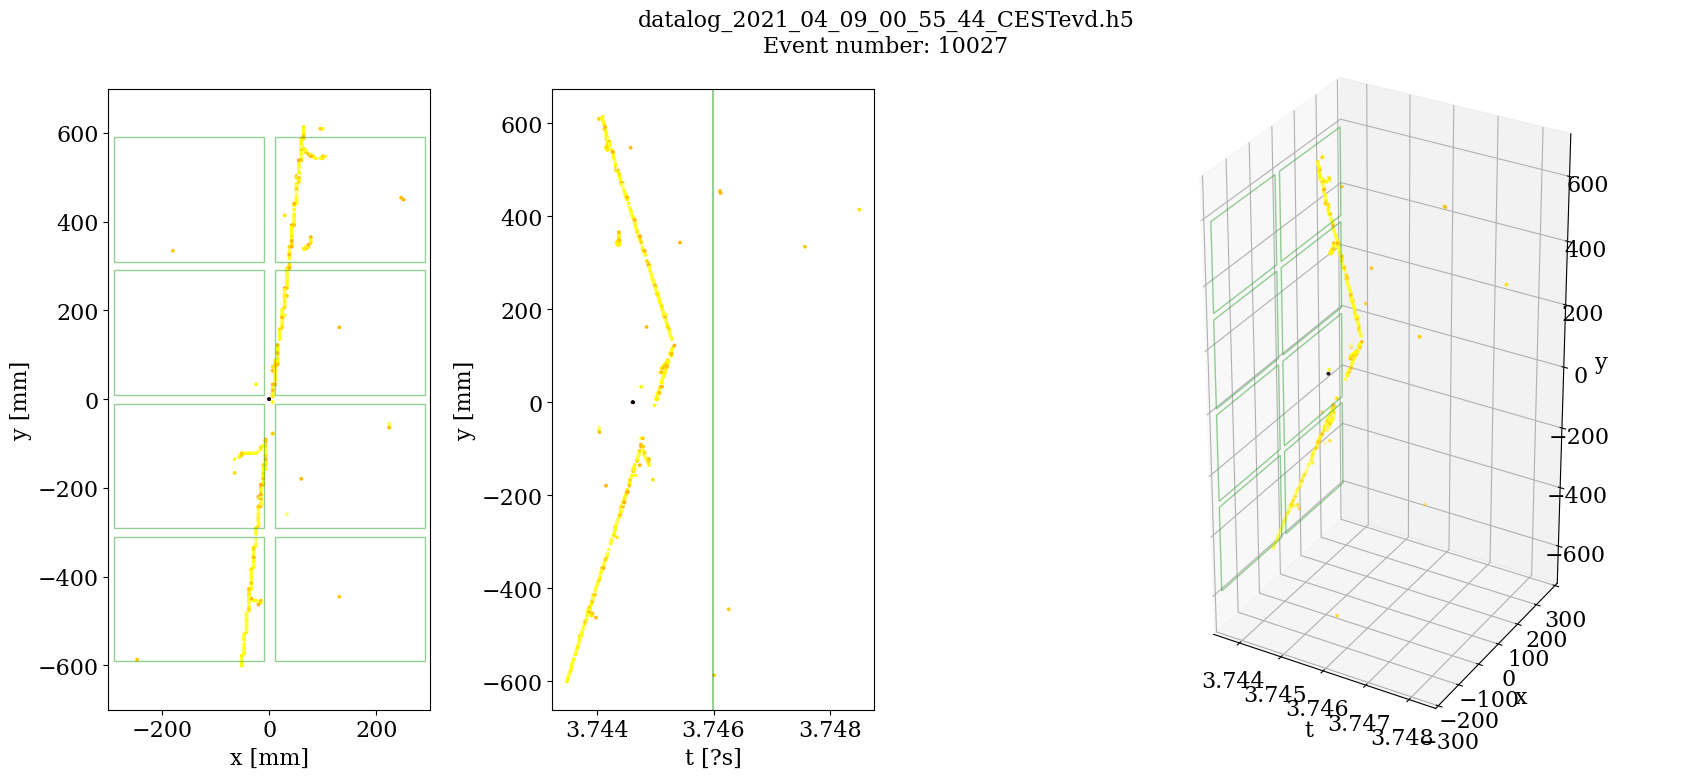

In [94]:
evn = 10027

t_hits = hits[events[evn]['hit_ref']]
xs = t_hits['px']
ys = t_hits['py']
ts = t_hits['ts']/1e6
qs = t_hits['q']

### PLOT START
fig = plt.figure(figsize=(18,8),facecolor='white',dpi=100)

gspan = [1,4]
cmap = 'hot'
size = 3
rcords = [
    [10,10],
    [-290,10],
    [10,-290],
    [-290,-290],
    [10,310],
    [-290,310],
    [10,-590],
    [-290,-590],
]
gridspec.GridSpec(gspan[0],gspan[1])


### PLOT 1
gs = fig.add_gridspec(gspan[0],gspan[1])
ax = fig.add_subplot(gs[0:1, 0:1])
ax.scatter(xs,ys,c=qs,s=size,cmap=cmap)
for rcord in rcords:
    rect = plt.Rectangle([rcord[0],rcord[1]], 280, 280, facecolor='none', edgecolor='C2', alpha=0.5)
    ax.add_patch(rect)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.xlim(-300,300)
plt.ylim(-700,700)

## PLOT 2
gs = fig.add_gridspec(gspan[0],gspan[1])
ax = fig.add_subplot(gs[0:1, 1:2])
meant = (np.max(ts)+np.min(ts))/2
ax.scatter(ts,ys,c=qs,s=size,cmap=cmap)
plt.axvline(meant,color='C2',alpha=0.5)
plt.xlabel('t [?s]')
plt.ylabel('y [mm]')

## PLOT 3
gs = fig.add_gridspec(gspan[0],gspan[1])
ax = fig.add_subplot(gs[0:1, 2:4],projection='3d')
# plt.subplot2grid(gspan, (2,0),projection='3d')
# ax = plt.gca()
rect = plt.Rectangle([-300,-600], 600, 1200, facecolor='none', edgecolor='C2', alpha=0.5)
for rcord in rcords:
    rect = plt.Rectangle([rcord[0],rcord[1]], 280, 280, facecolor='none', edgecolor='C2', alpha=0.5)
    ax.add_patch(rect)
    art3d.pathpatch_2d_to_3d(rect, z=min(ts), zdir="x")
ax.scatter(ts,xs,ys,c=qs,s=size,cmap=cmap)
ax.set_xlim3d(min(ts),max(ts))
ax.set_ylim3d(-300,300)
ax.set_zlim3d(-700,700)
ax.set_box_aspect(aspect = (1,1,2))
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')

### ALL PLOTS
printname = fname.split('/')[-1]
plt.suptitle(f'{printname}\nEvent number: {evn}',fontsize=16)
plt.tight_layout()
plt.show()